In [1]:
import torch
import numpy as np
from torch import nn
from torchvision.datasets import MNIST
import torchvision.transforms  as transforms
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torch import nn

In [2]:
mnist_train = MNIST(
    root='./datasets/MNIST',
    train = True,
    download =True,
    transform=transforms.ToTensor())

mnist_test = MNIST(root='./datasets/MNIST',
                   train = False,
                   download =True,
                   transform=transforms.ToTensor())

E:\anaconda\envs\dl\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
batch_size = 256
train_iter = DataLoader(
    dataset = mnist_train,
    shuffle = True,
    batch_size = batch_size,
    num_workers = 0
)
test_iter = DataLoader(
    dataset  = mnist_test,
    shuffle  =False,
    batch_size = batch_size,
    num_workers = 0
)

In [4]:
num_input ,num_hiddens ,num_output = 784,256,10
W1 =  torch.tensor(np.random.normal(0,0.01,size = (num_hiddens,num_input)),dtype = torch.float32)
b1 = torch.zeros(1,dtype = torch.float32)

W2 =  torch.tensor(np.random.normal(0,0.01,size = (num_output,num_hiddens)),dtype = torch.float32)
b2 = torch.zeros(1,dtype = torch.float32)

params = [W1 ,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad = True)

In [5]:
def ReLU(X):
    return torch.max(X,other = torch.tensor(0.0))

In [6]:
def net(x):
    x = x.view(-1,num_input)
    H1 = ReLU(torch.matmul(x,W1.t())+b1)
    H2 = torch.matmul(H1,W2.t()+b2)
    return H2

In [7]:
#定义多分类交叉熵损失函数
loss = torch.nn.CrossEntropyLoss()
def SGD(params,lr):
    for param in params:
        param.data -= param.grad/batch_size

In [8]:
def evaluate_loss(data_iter,net):
        acc_sum,loss_sum,n= 0,0,0
        for x,y in data_iter:
            y_pred = net(x)
            l = loss(y_pred,y)
            loss_sum += l.item()
            acc_sum += (y_pred.argmax(dim =1)==y).sum().item()
            n += y.shape[0]
        return acc_sum/n,loss_sum/n

In [9]:
def train(net,train_iter,test_iter,loss,num_epochs,batch_size,lr):
    train_ls ,test_ls = [],[]
    for epoch in range(num_epochs):
        train_l_sum, train_acc_num,n = 0.0,0.0,0
        for x ,y in train_iter:
            y_pred = net(x)
            l = loss(y_pred,y)
            if params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            SGD(params,lr)
            train_l_sum += l.item()
            train_acc_num += (y_pred.argmax(dim = 1)==y).sum().item()
            n +=y.shape[0]
        train_ls.append(train_l_sum/n)
        test_acc,test_l = evaluate_loss(test_iter,net)
        test_ls.append(test_l)
        print('epoch %d, train_loss %.6f,test_loss %f,train_acc %.6f,test_acc %.6f'%(epoch+1, train_ls[epoch],test_ls[epoch],train_acc_num/n,test_acc))
    return train_ls,test_ls

In [12]:
lr = 0.01
num_epochs = 50
train_loss,test_loss = train(net,train_iter,test_iter,loss,num_epochs,batch_size,lr)

epoch 1, train_loss 0.008965,test_loss 0.009087,train_acc 0.220850,test_acc 0.354600
epoch 2, train_loss 0.008793,test_loss 0.008836,train_acc 0.450117,test_acc 0.540500
epoch 3, train_loss 0.008454,test_loss 0.008358,train_acc 0.591567,test_acc 0.633600
epoch 4, train_loss 0.007838,test_loss 0.007534,train_acc 0.632000,test_acc 0.653100
epoch 5, train_loss 0.006900,test_loss 0.006436,train_acc 0.655700,test_acc 0.693800
epoch 6, train_loss 0.005830,test_loss 0.005360,train_acc 0.699283,test_acc 0.736300
epoch 7, train_loss 0.004889,test_loss 0.004504,train_acc 0.744033,test_acc 0.769600
epoch 8, train_loss 0.004171,test_loss 0.003874,train_acc 0.774967,test_acc 0.795100
epoch 9, train_loss 0.003642,test_loss 0.003410,train_acc 0.798083,test_acc 0.808700
epoch 10, train_loss 0.003248,test_loss 0.003062,train_acc 0.812400,test_acc 0.822500
epoch 11, train_loss 0.002950,test_loss 0.002795,train_acc 0.824517,test_acc 0.834500
epoch 12, train_loss 0.002718,test_loss 0.002584,train_acc 0.83

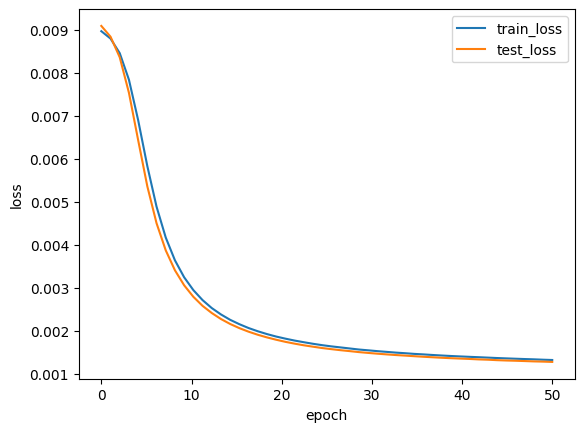

In [13]:
x = np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label="train_loss",linewidth=1.5)
plt.plot(x,test_loss,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

nn

In [11]:
batch_size =64
train_iter = DataLoader(
    dataset = mnist_train,
    batch_size = batch_size,
    shuffle = True,
)
test_iter = DataLoader(
    dataset = mnist_test,
    batch_size = batch_size,
    shuffle = True,
)

In [12]:
num_input,num_hidden1,num_hidden2,num_output = 28*28,512,256,10

class DNN(nn.Module):
    def __init__(self,num_input,num_hidden1,num_hidden2,num_output):
        super(DNN,self).__init__()
        self.linear1 = nn.Linear(num_input,num_hidden1)
        self.linear2 = nn.Linear(num_hidden1,num_hidden2)
        self.linear3 = nn.Linear(num_hidden2,num_output)
    def forward(self,input):
        input = input.view(-1,784)
        out = self.linear1(input)
        out = self.linear2(out)
        out = self.linear3(out)
        return out

In [13]:
net = DNN(num_input,num_hidden1,num_hidden2,num_output)
for param in net.parameters():
    nn.init.normal_(param,mean=0,std=0.001)

In [14]:
def train(net,train_iter,test_iter,loss,num_epochs):
    train_ls,test_ls,train_acc,test_acc = [],[],[],[]
    for epoch in range(num_epochs):
        train_ls_sum,train_acc_sum,n = 0,0,0
        for x,y in train_iter:
            y_pred = net(x)
            l = loss(y_pred,y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_ls_sum +=l.item()
            train_acc_sum += (y_pred.argmax(dim = 1)==y).sum().item()
            n += y_pred.shape[0]
        train_ls.append(train_ls_sum)
        train_acc.append(train_acc_sum/n)

        test_ls_sum,test_acc_sum,n = 0,0,0
        for x,y in test_iter:
            y_pred = net(x)
            l = loss(y_pred,y)
            test_ls_sum +=l.item()
            test_acc_sum += (y_pred.argmax(dim = 1)==y).sum().item()
            n += y_pred.shape[0]
        test_ls.append(test_ls_sum)
        test_acc.append(test_acc_sum/n)
        print('epoch %d, train_loss %.6f,test_loss %f, train_acc %.6f,test_acc %f'
              %(epoch+1, train_ls[epoch],test_ls[epoch], train_acc[epoch],test_acc[epoch]))
    return train_ls,test_ls,train_acc,test_acc

In [18]:
#训练次数和学习率
num_epochs = 20
lr = 0.01
loss  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(),lr=lr)

In [19]:
train_loss,test_loss,train_acc,test_acc = train(net,train_iter,test_iter,loss,num_epochs)

epoch 1, train_loss 2159.172430,test_loss 361.303300, train_acc 0.112067,test_acc 0.113500
epoch 2, train_loss 2158.638252,test_loss 361.262220, train_acc 0.112367,test_acc 0.113500
epoch 3, train_loss 2158.555718,test_loss 361.273353, train_acc 0.112367,test_acc 0.113500
epoch 4, train_loss 2158.528461,test_loss 361.255955, train_acc 0.112367,test_acc 0.113500
epoch 5, train_loss 2158.512263,test_loss 361.271398, train_acc 0.112367,test_acc 0.113500
epoch 6, train_loss 2158.514955,test_loss 361.266227, train_acc 0.112367,test_acc 0.113500
epoch 7, train_loss 2158.480537,test_loss 361.218048, train_acc 0.112367,test_acc 0.113500
epoch 8, train_loss 2158.435770,test_loss 361.208390, train_acc 0.112367,test_acc 0.113500
epoch 9, train_loss 2158.280183,test_loss 361.185021, train_acc 0.112367,test_acc 0.113500
epoch 10, train_loss 2157.626847,test_loss 360.909570, train_acc 0.112367,test_acc 0.113500
epoch 11, train_loss 2141.215702,test_loss 345.620435, train_acc 0.155533,test_acc 0.2108

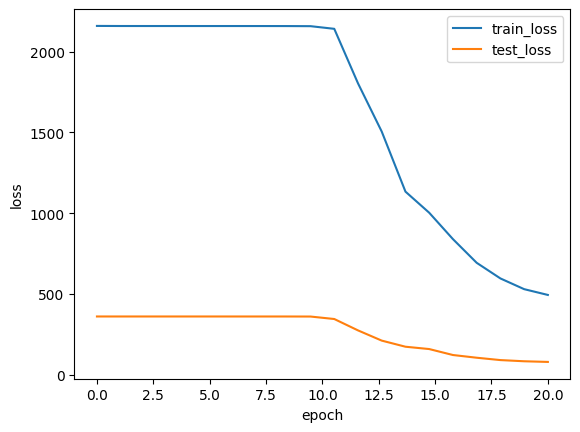

In [20]:
x = np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label="train_loss",linewidth=1.5)
plt.plot(x,test_loss,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

3 激活函数

In [15]:
batch_size = 256
train_iter = DataLoader(dataset = mnist_train,shuffle = True,batch_size = batch_size)
test_iter = DataLoader(dataset = mnist_test,shuffle = True,batch_size = batch_size)

In [16]:
class FlattenLayer(torch.nn.Module):
    def __init__(self):
         super(FlattenLayer, self).__init__()
    def forward(self, x):
        return x.view(x.shape[0],784)

In [17]:
num_input,num_hidden1,num_hidden2,num_output = 28*28,512,256,10
def choose_model(model_type):
    if model_type =='ReLU':
        activation = nn.ReLU()
    elif model_type =='ELU':
        activation = nn.ELU()
    else:
        activation = nn.Sigmoid()
    model = nn.Sequential()
    model.add_module("flatten",FlattenLayer())
    model.add_module("linear1",nn.Linear(num_input,num_hidden1))
    model.add_module("activation",activation)
    model.add_module("linear2",nn.Linear(num_hidden1,num_hidden2))
    model.add_module("activation",activation)
    model.add_module("linear3",nn.Linear(num_hidden2,num_output))
    return model


In [19]:
model = choose_model('ReLU')
print(model)

Sequential(
  (flatten): FlattenLayer()
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=512, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=10, bias=True)
)


In [24]:
# for param in model.parameters():
#     nn.init.normal_(param,mean=0,std=0.001)

for m in model.modules():
     if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            nn.init.constant_(m.bias, 0.1)

In [25]:
def train(net,train_iter,test_iter,loss,num_epochs):
    train_ls,test_ls,train_acc,test_acc = [],[],[],[]
    for epoch in range(num_epochs):
        train_ls_sum,train_acc_sum,n = 0,0,0
        for x,y in train_iter:
            y_pred = net(x)
            l = loss(y_pred,y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_ls_sum +=l.item()
            train_acc_sum += (y_pred.argmax(dim = 1)==y).sum().item()
            n += y_pred.shape[0]
        train_ls.append(train_ls_sum)
        train_acc.append(train_acc_sum/n)

        test_ls_sum,test_acc_sum,n = 0,0,0
        for x,y in test_iter:
            y_pred = net(x)
            l = loss(y_pred,y)
            test_ls_sum +=l.item()
            test_acc_sum += (y_pred.argmax(dim = 1)==y).sum().item()
            n += y_pred.shape[0]
        test_ls.append(test_ls_sum)
        test_acc.append(test_acc_sum/n)
        print('epoch %d, train_loss %.6f,test_loss %f, train_acc %.6f,test_acc %f'
              %(epoch+1, train_ls[epoch],test_ls[epoch], train_acc[epoch],test_acc[epoch]))
    return train_ls,test_ls,train_acc,test_acc_sum

In [26]:
#训练次数和学习率
num_epochs = 20
lr = 0.01
loss  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

In [27]:
train_loss,test_loss,train_acc,test_acc = train(model,train_iter,test_iter,loss,num_epochs)

epoch 1, train_loss 260.764086,test_loss 24.537365, train_acc 0.731583,test_acc 0.857800
epoch 2, train_loss 125.178088,test_loss 17.770952, train_acc 0.867183,test_acc 0.888100
epoch 3, train_loss 99.934735,test_loss 15.607762, train_acc 0.886183,test_acc 0.900400
epoch 4, train_loss 88.625858,test_loss 13.868404, train_acc 0.896433,test_acc 0.905900
epoch 5, train_loss 81.883126,test_loss 12.753856, train_acc 0.902767,test_acc 0.911600
epoch 6, train_loss 77.010949,test_loss 11.971712, train_acc 0.907767,test_acc 0.915500
epoch 7, train_loss 73.389597,test_loss 11.645423, train_acc 0.911467,test_acc 0.917600
epoch 8, train_loss 70.271367,test_loss 11.142990, train_acc 0.915367,test_acc 0.922600
epoch 9, train_loss 67.660866,test_loss 10.764152, train_acc 0.918283,test_acc 0.923900
epoch 10, train_loss 65.370478,test_loss 10.580919, train_acc 0.922083,test_acc 0.926400
epoch 11, train_loss 63.342686,test_loss 10.404310, train_acc 0.924283,test_acc 0.926600
epoch 12, train_loss 61.4429

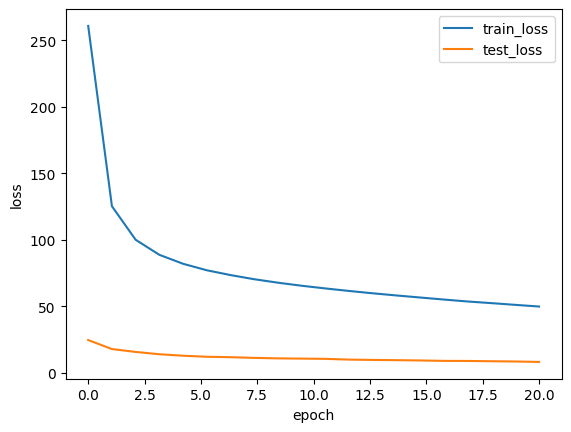

In [28]:
x = np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label="train_loss",linewidth=1.5)
plt.plot(x,test_loss,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

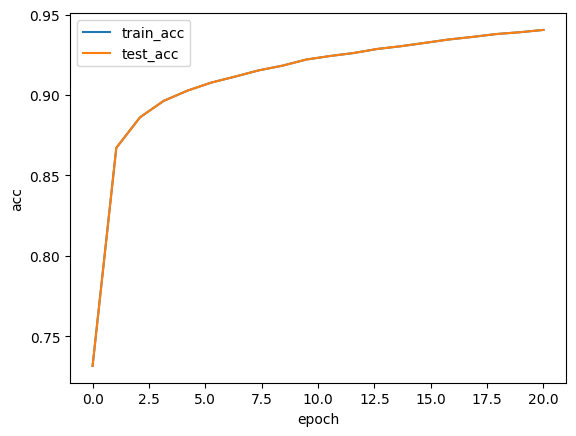

In [29]:
x = np.linspace(0,len(train_acc),len(train_acc))
plt.plot(x,train_acc,label="train_acc",linewidth=1.5)
plt.plot(x,train_acc,label="test_acc",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

elu

In [20]:
model = choose_model('ELU')
print(model)

Sequential(
  (flatten): FlattenLayer()
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (activation): ELU(alpha=1.0)
  (linear2): Linear(in_features=512, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=10, bias=True)
)


In [21]:
for m in model.modules():
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.constant_(m.bias, 0.1)


def train(net, train_iter, test_iter, loss, num_epochs):
    train_ls, test_ls, train_acc, test_acc = [], [], [], []
    for epoch in range(num_epochs):
        train_ls_sum, train_acc_sum, n = 0, 0, 0
        for x, y in train_iter:
            y_pred = net(x)
            l = loss(y_pred, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_ls_sum += l.item()
            train_acc_sum += (y_pred.argmax(dim=1) == y).sum().item()
            n += y_pred.shape[0]
        train_ls.append(train_ls_sum)
        train_acc.append(train_acc_sum / n)

        test_ls_sum, test_acc_sum, n = 0, 0, 0
        for x, y in test_iter:
            y_pred = net(x)
            l = loss(y_pred, y)
            test_ls_sum += l.item()
            test_acc_sum += (y_pred.argmax(dim=1) == y).sum().item()
            n += y_pred.shape[0]
        test_ls.append(test_ls_sum)
        test_acc.append(test_acc_sum / n)
        print('epoch %d, train_loss %.6f,test_loss %f, train_acc %.6f,test_acc %f'
              % (epoch + 1, train_ls[epoch], test_ls[epoch], train_acc[epoch], test_acc[epoch]))
    return train_ls, test_ls, train_acc, test_acc_sum


#训练次数和学习率
num_epochs = 20
lr = 0.01
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
train_loss, test_loss, train_acc, test_acc = train(model, train_iter, test_iter, loss, num_epochs)

epoch 1, train_loss 231.995392,test_loss 22.544444, train_acc 0.752100,test_acc 0.861800
epoch 2, train_loss 117.769077,test_loss 16.728036, train_acc 0.869800,test_acc 0.886100
epoch 3, train_loss 98.563668,test_loss 14.772172, train_acc 0.885883,test_acc 0.897200
epoch 4, train_loss 89.719931,test_loss 14.199392, train_acc 0.893583,test_acc 0.903500
epoch 5, train_loss 84.470955,test_loss 13.158053, train_acc 0.898083,test_acc 0.909000
epoch 6, train_loss 80.878372,test_loss 12.771977, train_acc 0.902533,test_acc 0.911200
epoch 7, train_loss 78.280919,test_loss 12.429976, train_acc 0.905050,test_acc 0.911100
epoch 8, train_loss 76.244137,test_loss 11.949701, train_acc 0.906967,test_acc 0.913400
epoch 9, train_loss 74.601551,test_loss 12.341084, train_acc 0.909350,test_acc 0.916300
epoch 10, train_loss 73.124515,test_loss 11.639316, train_acc 0.911133,test_acc 0.917200
epoch 11, train_loss 72.031966,test_loss 12.076948, train_acc 0.912700,test_acc 0.918000
epoch 12, train_loss 70.9895

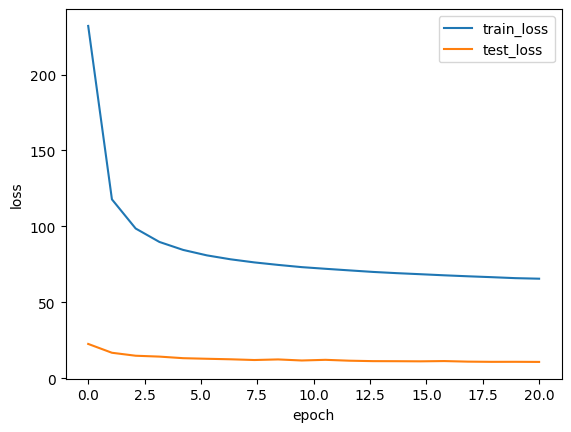

In [22]:
x = np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label="train_loss",linewidth=1.5)
plt.plot(x,test_loss,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

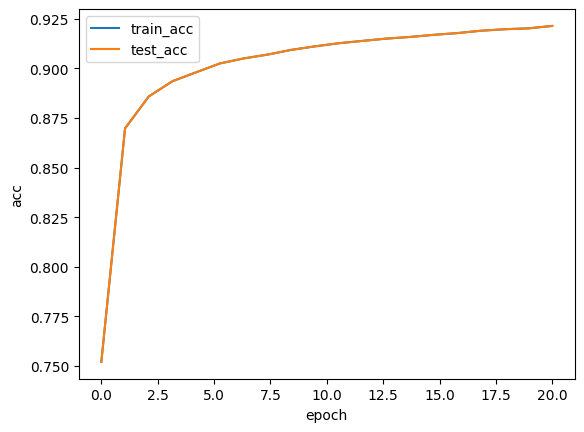

In [23]:
x = np.linspace(0,len(train_acc),len(train_acc))
plt.plot(x,train_acc,label="train_acc",linewidth=1.5)
plt.plot(x,train_acc,label="test_acc",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

In [24]:
model = choose_model('sigmoid')
print(model)

for m in model.modules():
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.constant_(m.bias, 0.1)


def train(net, train_iter, test_iter, loss, num_epochs):
    train_ls, test_ls, train_acc, test_acc = [], [], [], []
    for epoch in range(num_epochs):
        train_ls_sum, train_acc_sum, n = 0, 0, 0
        for x, y in train_iter:
            y_pred = net(x)
            l = loss(y_pred, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_ls_sum += l.item()
            train_acc_sum += (y_pred.argmax(dim=1) == y).sum().item()
            n += y_pred.shape[0]
        train_ls.append(train_ls_sum)
        train_acc.append(train_acc_sum / n)

        test_ls_sum, test_acc_sum, n = 0, 0, 0
        for x, y in test_iter:
            y_pred = net(x)
            l = loss(y_pred, y)
            test_ls_sum += l.item()
            test_acc_sum += (y_pred.argmax(dim=1) == y).sum().item()
            n += y_pred.shape[0]
        test_ls.append(test_ls_sum)
        test_acc.append(test_acc_sum / n)
        print('epoch %d, train_loss %.6f,test_loss %f, train_acc %.6f,test_acc %f'
              % (epoch + 1, train_ls[epoch], test_ls[epoch], train_acc[epoch], test_acc[epoch]))
    return train_ls, test_ls, train_acc, test_acc_sum


#训练次数和学习率
num_epochs = 20
lr = 0.01
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
train_loss, test_loss, train_acc, test_acc = train(model, train_iter, test_iter, loss, num_epochs)

Sequential(
  (flatten): FlattenLayer()
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (activation): Sigmoid()
  (linear2): Linear(in_features=512, out_features=256, bias=True)
  (linear3): Linear(in_features=256, out_features=10, bias=True)
)
epoch 1, train_loss 466.160097,test_loss 66.116713, train_acc 0.507383,test_acc 0.698300
epoch 2, train_loss 330.819007,test_loss 46.779971, train_acc 0.739917,test_acc 0.783400
epoch 3, train_loss 240.053846,test_loss 34.769068, train_acc 0.800200,test_acc 0.824700
epoch 4, train_loss 188.161249,test_loss 28.395241, train_acc 0.830067,test_acc 0.838200
epoch 5, train_loss 158.030981,test_loss 24.256231, train_acc 0.846800,test_acc 0.859000
epoch 6, train_loss 139.027826,test_loss 22.058888, train_acc 0.856783,test_acc 0.869700
epoch 7, train_loss 126.270912,test_loss 19.641712, train_acc 0.866233,test_acc 0.874300
epoch 8, train_loss 117.215877,test_loss 18.540327, train_acc 0.872417,test_acc 0.880300
epoch 9, train_loss 110

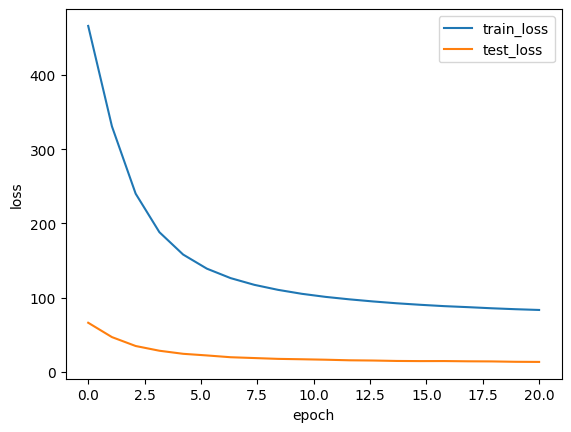

In [25]:
x = np.linspace(0, len(train_loss), len(train_loss))
plt.plot(x, train_loss, label="train_loss", linewidth=1.5)
plt.plot(x, test_loss, label="test_loss", linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()


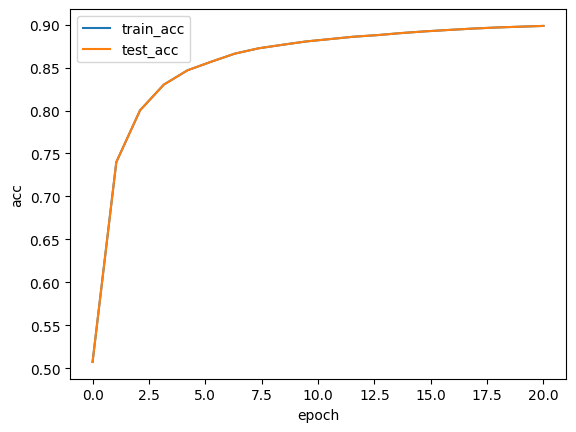

In [26]:
x = np.linspace(0, len(train_acc), len(train_acc))
plt.plot(x, train_acc, label="train_acc", linewidth=1.5)
plt.plot(x, train_acc, label="test_acc", linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
plt.show()

评估隐藏层层数和隐藏单元个数对实验结果的影响

In [46]:
from torch.utils.data import TensorDataset

train_x = mnist_train.data.cuda().type(torch.float32)
train_y = mnist_train.targets.cuda()
test_x = mnist_test.data.cuda().type(torch.float32)
test_y = mnist_test.targets.cuda()
batch_size = 64
train_data = TensorDataset(train_x,train_y)
train_iter = DataLoader(
    dataset = train_data,
    shuffle = True,
    batch_size = batch_size
)
test_data = TensorDataset(test_x,test_y)
test_iter = DataLoader(
    dataset = test_data,
    shuffle = True,
    batch_size = batch_size
)

In [52]:
class flatten(nn.Module):
    def __init__(self):
        super(flatten,self).__init__()
    def forward(self,x):
        return x.view(x.shape[0],784)

class  Linear1(nn.Module ):
    def __init__(self,num_input,num_hidden,num_output):
        super(Linear1,self).__init__()
        self.linear1 = nn.Linear(num_input,num_hidden)
        self.linear2 = nn.Linear(num_hidden,num_output)
        self.flatten = flatten()
        self.relu = nn.ReLU()
    def forward(self,input):
        out = self.flatten(input)
        out = self.relu(self.linear1(out))
        out = self.linear2(out)
        return out
class  Linear2(nn.Module ):
    def __init__(self,num_input,num_hidden1,num_hidden2,num_output):
        super(Linear2,self).__init__()
        self.linear1 = nn.Linear(num_input,num_hidden1)
        self.linear2 = nn.Linear(num_hidden1,num_hidden2)
        self.linear3 = nn.Linear(num_hidden2,num_output)
        self.flatten = flatten()
        self.relu = nn.ReLU()
    def forward(self,input):
        out = self.flatten(input)
        out = self.relu(self.linear1(out))
        out = self.relu(self.linear2(out))
        out = self.linear3(out)
        return out
class  Linear3(nn.Module ):
    def __init__(self,num_input,num_hidden1,num_hidden2,num_hidden3,num_output):
        super(Linear3,self).__init__()
        self.linear1 = nn.Linear(num_input,num_hidden1)
        self.linear2 = nn.Linear(num_hidden1,num_hidden2)
        self.linear3 = nn.Linear(num_hidden2,num_hidden3)
        self.linear4 = nn.Linear(num_hidden3,num_output)
        self.flatten = flatten()
        self.relu = nn.ReLU()
    def forward(self,input):
        out = self.flatten(input)
        out = self.relu(self.linear1(out))
        out = self.relu(self.linear2(out))
        out = self.relu(self.linear3(out))
        out = self.linear4(out)
        return out

In [37]:
num_input,num_hidden,num_output = 784,256,10
lr = 0.001
net = Linear1(num_input,num_hidden,num_output).cuda()
loss = nn.CrossEntropyLoss(reduction='mean')
# optimizer = torch.optim.Adam(net.parameters(),lr = lr)
optimizer = torch.optim.SGD(net.parameters(),lr = lr)

In [38]:
def train(net,train_iter,test_iter,loss,num_epochs,batch_size,optimizer):
    train_ls ,test_ls, train_acc,test_acc = [],[],[],[]
    for epoch in range(num_epochs):
        train_ls_sum,train_acc_sum,n = 0,0,0
        for x,y in train_iter:
            y_pred = net(x)
            l = loss(y_pred,y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_ls_sum +=l
            train_acc_sum += (y_pred.argmax(dim = 1) == y).sum().item()
            n += x.shape[0]
        train_ls.append(train_ls_sum)
        train_acc.append(train_acc_sum/n)

        test_ls_sum,test_acc_sum ,n = 0,0,0
        for x,y in test_iter:
            y_pred = net(x)
            l = loss(y_pred,y)
            test_ls_sum +=l
            test_acc_sum += (y_pred.argmax(dim = 1) == y).sum().item()
            n += x.shape[0]
        test_ls.append(test_ls_sum)
        test_acc.append(test_acc_sum/n)
        print('epoch: %d, train loss: %f, test loss: %f , train acc: %f, test acc: %f  '
              %(epoch+1,train_ls[-1],test_ls[-1],train_acc[-1],test_acc[-1]))
    return train_ls,test_ls

In [40]:
num_epochs = 40
train_ls,test_ls = train(net,train_iter,test_iter,loss,num_epochs,batch_size,optimizer)

epoch: 1, train loss: 2.172900, test loss: 22.340588 , train acc: 0.999983, test acc: 0.969400  
epoch: 2, train loss: 2.049651, test loss: 22.255110 , train acc: 0.999983, test acc: 0.969600  
epoch: 3, train loss: 1.932665, test loss: 22.460875 , train acc: 0.999983, test acc: 0.969900  
epoch: 4, train loss: 1.842235, test loss: 22.413078 , train acc: 0.999983, test acc: 0.969600  
epoch: 5, train loss: 1.742343, test loss: 22.424410 , train acc: 1.000000, test acc: 0.970200  
epoch: 6, train loss: 1.667302, test loss: 22.499420 , train acc: 0.999983, test acc: 0.970300  
epoch: 7, train loss: 1.586456, test loss: 22.631544 , train acc: 1.000000, test acc: 0.969900  
epoch: 8, train loss: 1.508221, test loss: 22.646633 , train acc: 1.000000, test acc: 0.970100  
epoch: 9, train loss: 1.448943, test loss: 22.723598 , train acc: 1.000000, test acc: 0.970300  
epoch: 10, train loss: 1.387798, test loss: 22.672939 , train acc: 1.000000, test acc: 0.970400  
epoch: 11, train loss: 1.3388

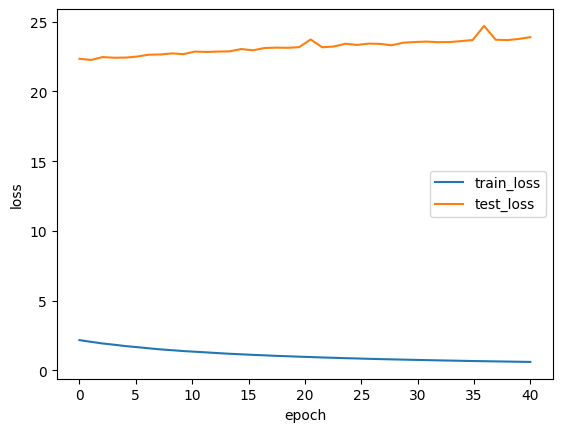

In [41]:
#结果可视化
for i, v in enumerate(train_ls): train_ls[i] = v.cpu().item()
for i, v in enumerate(test_ls): test_ls[i] = v.cpu().item()
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,train_ls,label="train_loss",linewidth=1.5)
plt.plot(x,test_ls,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [42]:
num_input, num_hidden, num_output = 784, 10, 10
lr = 0.001
net = Linear1(num_input, num_hidden, num_output).cuda()
loss = nn.CrossEntropyLoss(reduction='mean')
# optimizer = torch.optim.Adam(net.parameters(),lr = lr)
optimizer = torch.optim.SGD(net.parameters(), lr=lr)


def train(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer):
    train_ls, test_ls, train_acc, test_acc = [], [], [], []
    for epoch in range(num_epochs):
        train_ls_sum, train_acc_sum, n = 0, 0, 0
        for x, y in train_iter:
            y_pred = net(x)
            l = loss(y_pred, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_ls_sum += l
            train_acc_sum += (y_pred.argmax(dim=1) == y).sum().item()
            n += x.shape[0]
        train_ls.append(train_ls_sum)
        train_acc.append(train_acc_sum / n)

        test_ls_sum, test_acc_sum, n = 0, 0, 0
        for x, y in test_iter:
            y_pred = net(x)
            l = loss(y_pred, y)
            test_ls_sum += l
            test_acc_sum += (y_pred.argmax(dim=1) == y).sum().item()
            n += x.shape[0]
        test_ls.append(test_ls_sum)
        test_acc.append(test_acc_sum / n)
        print('epoch: %d, train loss: %f, test loss: %f , train acc: %f, test acc: %f  '
              % (epoch + 1, train_ls[-1], test_ls[-1], train_acc[-1], test_acc[-1]))
    return train_ls, test_ls


num_epochs = 40
train_ls, test_ls = train(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer)

epoch: 1, train loss: 1974.980469, test loss: 277.012970 , train acc: 0.159750, test acc: 0.271200  
epoch: 2, train loss: 1635.252197, test loss: 266.693115 , train acc: 0.336883, test acc: 0.388300  
epoch: 3, train loss: 1542.855347, test loss: 250.292297 , train acc: 0.385183, test acc: 0.386700  
epoch: 4, train loss: 1454.880371, test loss: 225.004868 , train acc: 0.410083, test acc: 0.486500  
epoch: 5, train loss: 1262.572998, test loss: 204.891724 , train acc: 0.490133, test acc: 0.515600  
epoch: 6, train loss: 1166.161133, test loss: 193.796921 , train acc: 0.502600, test acc: 0.462500  
epoch: 7, train loss: 1092.241455, test loss: 193.289032 , train acc: 0.503117, test acc: 0.501300  
epoch: 8, train loss: 933.599792, test loss: 148.736725 , train acc: 0.612100, test acc: 0.653700  
epoch: 9, train loss: 847.144775, test loss: 178.452255 , train acc: 0.687900, test acc: 0.627500  
epoch: 10, train loss: 790.435913, test loss: 145.191696 , train acc: 0.725400, test acc: 0.7

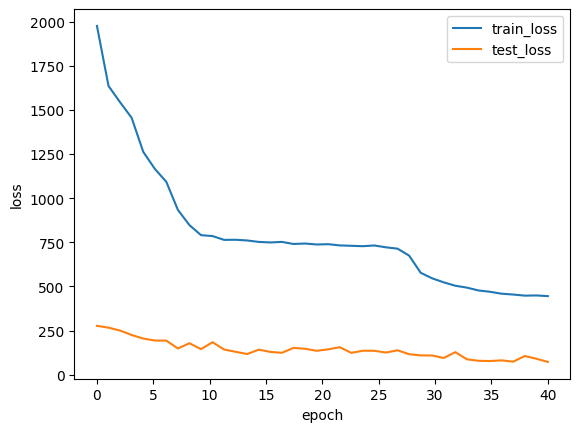

In [43]:
#结果可视化
for i, v in enumerate(train_ls): train_ls[i] = v.cpu().item()
for i, v in enumerate(test_ls): test_ls[i] = v.cpu().item()
x = np.linspace(0,len(train_ls),len(train_ls))
plt.plot(x,train_ls,label="train_loss",linewidth=1.5)
plt.plot(x,test_ls,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

隐藏单元个数减少，误差升高，准确率下降

In [68]:
batch_size = 64
train_data = TensorDataset(train_x,train_y)
train_iter = DataLoader(
    dataset = train_data,
    shuffle = True,
    batch_size = batch_size
)
test_data = TensorDataset(test_x,test_y)
test_iter = DataLoader(
    dataset = test_data,
    shuffle = True,
    batch_size = batch_size
)

In [69]:
import torch, gc

epoch: 1, train loss: 427.057343, test loss: 37.718472 , train acc: 0.880500, test acc: 0.930500  
epoch: 2, train loss: 179.508667, test loss: 29.484047 , train acc: 0.943467, test acc: 0.943800  
epoch: 3, train loss: 133.095840, test loss: 28.476381 , train acc: 0.957833, test acc: 0.946000  
epoch: 4, train loss: 106.827019, test loss: 23.287834 , train acc: 0.965700, test acc: 0.953500  
epoch: 5, train loss: 88.731888, test loss: 22.068470 , train acc: 0.971433, test acc: 0.958700  
epoch: 6, train loss: 75.495094, test loss: 21.157871 , train acc: 0.975583, test acc: 0.959000  
epoch: 7, train loss: 64.990463, test loss: 20.288179 , train acc: 0.979350, test acc: 0.960900  
epoch: 8, train loss: 56.475857, test loss: 19.067839 , train acc: 0.982633, test acc: 0.963800  
epoch: 9, train loss: 49.601086, test loss: 18.823851 , train acc: 0.984917, test acc: 0.963600  
epoch: 10, train loss: 43.854549, test loss: 18.519445 , train acc: 0.987050, test acc: 0.965400  
epoch: 11, trai

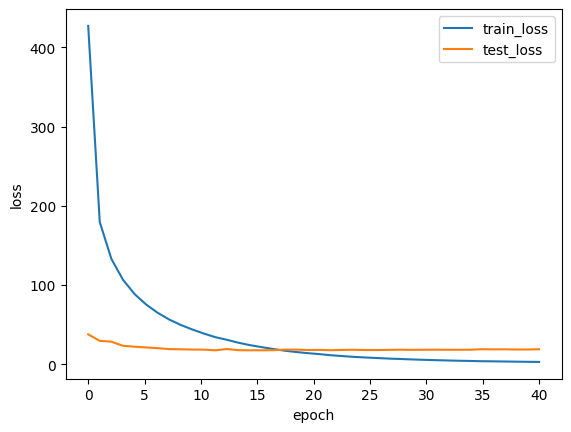

In [70]:
#使用两个隐藏层，隐藏层单元数为256、128
num_input,num_hidden1,num_hidden1,num_output = 784,256,128,10
lr = 0.001
net = Linear2(num_input,num_hidden1,num_hidden1,num_output).cuda()
loss = nn.CrossEntropyLoss(reduction='mean')
# optimizer = torch.optim.Adam(net.parameters(),lr = lr)
optimizer = torch.optim.SGD(net.parameters(),lr = lr)

def train(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer):
    train_ls, test_ls, train_acc, test_acc = [], [], [], []
    for epoch in range(num_epochs):
        train_ls_sum, train_acc_sum, n = 0, 0, 0
        for x, y in train_iter:
            y_pred = net(x)
            l = loss(y_pred, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_ls_sum += l
            train_acc_sum += (y_pred.argmax(dim=1) == y).sum().item()
            n += x.shape[0]
        train_ls.append(train_ls_sum)
        train_acc.append(train_acc_sum / n)

        test_ls_sum, test_acc_sum, n = 0, 0, 0
        for x, y in test_iter:
            y_pred = net(x)
            l = loss(y_pred, y)
            test_ls_sum += l
            test_acc_sum += (y_pred.argmax(dim=1) == y).sum().item()
            n += x.shape[0]
        test_ls.append(test_ls_sum)
        test_acc.append(test_acc_sum / n)
        print('epoch: %d, train loss: %f, test loss: %f , train acc: %f, test acc: %f  '
              % (epoch + 1, train_ls[-1], test_ls[-1], train_acc[-1], test_acc[-1]))
        gc.collect()
        torch.cuda.empty_cache()
    return train_ls, test_ls


num_epochs = 40
train_ls, test_ls = train(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer)
#结果可视化
for i, v in enumerate(train_ls): train_ls[i] = v.cpu().item()
for i, v in enumerate(test_ls): test_ls[i] = v.cpu().item()
x = np.linspace(0, len(train_ls), len(train_ls))
plt.plot(x, train_ls, label="train_loss", linewidth=1.5)
plt.plot(x, test_ls, label="test_loss", linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

epoch: 1, train loss: 413.057190, test loss: 41.866024 , train acc: 0.869033, test acc: 0.918600  
epoch: 2, train loss: 190.047836, test loss: 29.511175 , train acc: 0.939033, test acc: 0.943000  
epoch: 3, train loss: 146.547516, test loss: 24.809145 , train acc: 0.952767, test acc: 0.950900  
epoch: 4, train loss: 120.786102, test loss: 23.621052 , train acc: 0.961267, test acc: 0.955100  
epoch: 5, train loss: 102.773666, test loss: 21.646929 , train acc: 0.967667, test acc: 0.958200  
epoch: 6, train loss: 89.189072, test loss: 19.933907 , train acc: 0.971600, test acc: 0.961100  
epoch: 7, train loss: 77.804779, test loss: 19.455400 , train acc: 0.975333, test acc: 0.961400  
epoch: 8, train loss: 68.740501, test loss: 18.392996 , train acc: 0.978217, test acc: 0.962700  
epoch: 9, train loss: 61.663334, test loss: 19.530247 , train acc: 0.980717, test acc: 0.959600  
epoch: 10, train loss: 55.054848, test loss: 17.149389 , train acc: 0.983250, test acc: 0.967300  
epoch: 11, tra

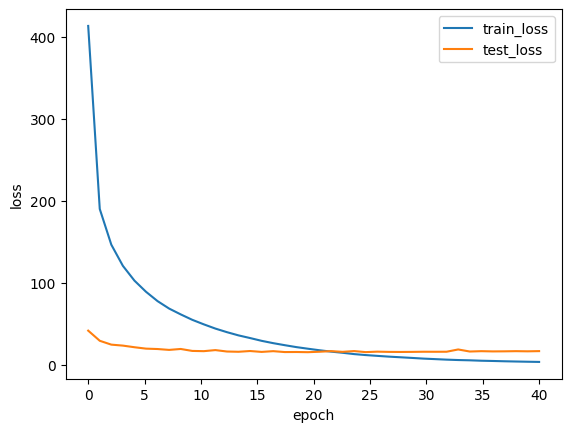

In [71]:
#使用三个隐藏层，隐藏层单元数为256、128
num_input,num_hidden1,num_hidden2,num_hidden3,num_output = 784,256,128,64,10
lr = 0.001
net = Linear3(num_input,num_hidden1,num_hidden2,num_hidden3,num_output)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device) # 移动模型到cuda
loss = nn.CrossEntropyLoss(reduction='mean')
# optimizer = torch.optim.Adam(net.parameters(),lr = lr)
optimizer = torch.optim.SGD(net.parameters(),lr = lr)

def train(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer):
    train_ls, test_ls, train_acc, test_acc = [], [], [], []
    for epoch in range(num_epochs):
        train_ls_sum, train_acc_sum, n = 0, 0, 0
        for x, y in train_iter:
            y_pred = net(x)
            l = loss(y_pred, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_ls_sum += l
            train_acc_sum += (y_pred.argmax(dim=1) == y).sum().item()
            n += x.shape[0]
        train_ls.append(train_ls_sum)
        train_acc.append(train_acc_sum / n)

        test_ls_sum, test_acc_sum, n = 0, 0, 0
        for x, y in test_iter:
            y_pred = net(x)
            l = loss(y_pred, y)
            test_ls_sum += l
            test_acc_sum += (y_pred.argmax(dim=1) == y).sum().item()
            n += x.shape[0]
        test_ls.append(test_ls_sum)
        test_acc.append(test_acc_sum / n)
        print('epoch: %d, train loss: %f, test loss: %f , train acc: %f, test acc: %f  '
              % (epoch + 1, train_ls[-1], test_ls[-1], train_acc[-1], test_acc[-1]))
        gc.collect()
        torch.cuda.empty_cache()
    return train_ls, test_ls


num_epochs = 40
train_ls, test_ls = train(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer)
#结果可视化
for i, v in enumerate(train_ls): train_ls[i] = v.cpu().item()
for i, v in enumerate(test_ls): test_ls[i] = v.cpu().item()
x = np.linspace(0, len(train_ls), len(train_ls))
plt.plot(x, train_ls, label="train_loss", linewidth=1.5)
plt.plot(x, test_ls, label="test_loss", linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

隐藏层层数从1变成2，准确率提高，变成3，准确率下降，但后两者都较高

在多分类任务实验中分别手动实现和用torch.nn实现dropout


In [98]:
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=0)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

In [99]:
#初始化参数
num_inputs,num_hiddens,num_outputs =784, 256,10
num_epochs=50
lr = 0.001
def init_param():
    W1 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens,num_inputs)), dtype=torch.float32)
    b1 = torch.zeros(1, dtype=torch.float32)
    W2 = torch.tensor(np.random.normal(0, 0.01, (num_outputs,num_hiddens)), dtype=torch.float32)
    b2 = torch.zeros(1, dtype=torch.float32)
    params =[W1,b1,W2,b2]
    for param in params:
        param.requires_grad_(requires_grad=True)
    return W1,b1,W2,b2

In [100]:
def dropout(X, drop_prob):
    X = X.float()
    assert 0 <= drop_prob <= 1
    keep_prob = 1 - drop_prob
    if keep_prob == 0:
        return torch.zeros_like(X)
    mask = (torch.rand(X.shape) < keep_prob).float()
    return mask * X / keep_prob

In [101]:
def net(X, is_training=True):
    X = X.view(-1, num_inputs)
    H1 = (torch.matmul(X, W1.t()) + b1).relu()
    if is_training:
        H1 = dropout(H1, drop_prob1)
    return (torch.matmul(H1,W2.t()) + b2).relu()

In [102]:
def train(net,train_iter,test_iter,loss,num_epochs,batch_size,lr=None,optimizer=None):
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        for X,y in train_iter:
            l=loss(net(X),y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls)
        ls, count = 0, 0
        for X,y in test_iter:
            l=loss(net(X,is_training=False),y)
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls)
        if(epoch+1)%10==0:
            print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

In [103]:
drop_probs = np.arange(0,1.1,0.1)
Train_ls, Test_ls = [], []
for drop_prob in drop_probs:
    drop_prob1 = drop_prob
    W1,b1,W2,b2 = init_param()
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD([W1,b1,W2,b2],lr = 0.001)
    train_ls, test_ls =  train(net,train_iter,test_iter,loss,num_epochs,batch_size,lr,optimizer)
    Train_ls.append(train_ls)
    Test_ls.append(test_ls)

epoch: 10, train loss: 512.245281, test loss: 86.528068
epoch: 20, train loss: 398.154881, test loss: 65.841612
epoch: 30, train loss: 258.200945, test loss: 42.214650
epoch: 40, train loss: 186.776041, test loss: 30.484752
epoch: 50, train loss: 151.642551, test loss: 24.694035
epoch: 10, train loss: 512.674013, test loss: 86.608307
epoch: 20, train loss: 400.419115, test loss: 66.201411
epoch: 30, train loss: 261.918741, test loss: 42.520155
epoch: 40, train loss: 191.204220, test loss: 30.727827
epoch: 50, train loss: 156.261619, test loss: 24.942962
epoch: 10, train loss: 518.764475, test loss: 87.742836
epoch: 20, train loss: 419.564694, test loss: 69.494276
epoch: 30, train loss: 277.642411, test loss: 44.874246
epoch: 40, train loss: 201.385456, test loss: 31.980586
epoch: 50, train loss: 164.044332, test loss: 25.692479
epoch: 10, train loss: 516.312150, test loss: 87.247562
epoch: 20, train loss: 412.660137, test loss: 68.145673
epoch: 30, train loss: 276.133500, test loss: 44

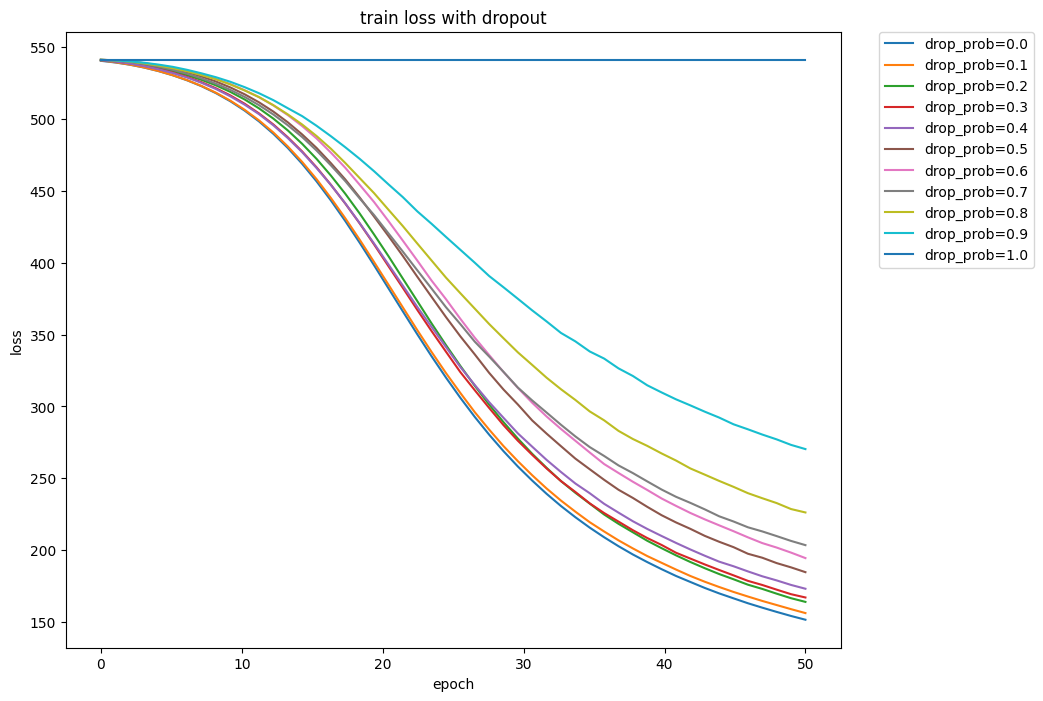

In [104]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.figure(figsize=(10,8))
for i in range(0,len(drop_probs)):
    plt.plot(x,Train_ls[i],label= 'drop_prob=%.1f'%(drop_probs[i]),linewidth=1.5)
    plt.xlabel('epoch')
    plt.ylabel('loss')
# plt.legend()
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.title('train loss with dropout')
plt.show()

nn

In [105]:
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=0)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

In [106]:
class LinearNet(nn.Module):
    def __init__(self,num_inputs, num_outputs, num_hiddens1, num_hiddens2, drop_prob1,drop_prob2):
        super(LinearNet,self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_hiddens1)
        self.relu = nn.ReLU()
        self.drop1 = nn.Dropout(drop_prob1)
        self.linear2 = nn.Linear(num_hiddens1,num_hiddens2)
        self.drop2 = nn.Dropout(drop_prob2)
        self.linear3 = nn.Linear(num_hiddens2,num_outputs)
        self.flatten  = nn.Flatten()

    def forward(self,x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.drop1(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.drop2(x)
        x = self.linear3(x)
        y = self.relu(x)
        return y

In [107]:
def train(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,optimizer=None):
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        for X,y in train_iter:
            l=loss(net(X),y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls)
        ls, count = 0, 0
        for X,y in test_iter:
            l=loss(net(X),y)
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls)
        if(epoch+1)%5==0:
            print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

In [108]:
num_inputs,num_hiddens1,num_hiddens2,num_outputs =784, 256,256,10
num_epochs=50
lr = 0.001
drop_probs = np.arange(0,1.1,0.1)
Train_ls, Test_ls = [], []
for drop_prob in drop_probs:
    net = LinearNet(num_inputs, num_outputs, num_hiddens1, num_hiddens2, drop_prob,drop_prob)
    for param in net.parameters():
        nn.init.normal_(param,mean=0, std= 0.01)
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(),lr)
    train_ls, test_ls = train(net,train_iter,test_iter,loss,num_epochs,batch_size,net.parameters,lr,optimizer)
    Train_ls.append(train_ls)
    Test_ls.append(test_ls)

epoch: 5, train loss: 541.033400, test loss: 92.088307
epoch: 10, train loss: 540.981080, test loss: 92.078831
epoch: 15, train loss: 540.935560, test loss: 92.070269
epoch: 20, train loss: 540.889604, test loss: 92.062157
epoch: 25, train loss: 540.847918, test loss: 92.054225
epoch: 30, train loss: 540.805071, test loss: 92.046102
epoch: 35, train loss: 540.757756, test loss: 92.037418
epoch: 40, train loss: 540.703895, test loss: 92.027791
epoch: 45, train loss: 540.642052, test loss: 92.016736
epoch: 50, train loss: 540.571554, test loss: 92.003596
epoch: 5, train loss: 541.102443, test loss: 92.102183
epoch: 10, train loss: 541.086597, test loss: 92.099824
epoch: 15, train loss: 541.074075, test loss: 92.097452
epoch: 20, train loss: 541.059219, test loss: 92.094845
epoch: 25, train loss: 541.026423, test loss: 92.088797
epoch: 30, train loss: 540.991717, test loss: 92.082533
epoch: 35, train loss: 540.952718, test loss: 92.076311
epoch: 40, train loss: 540.909780, test loss: 92.0

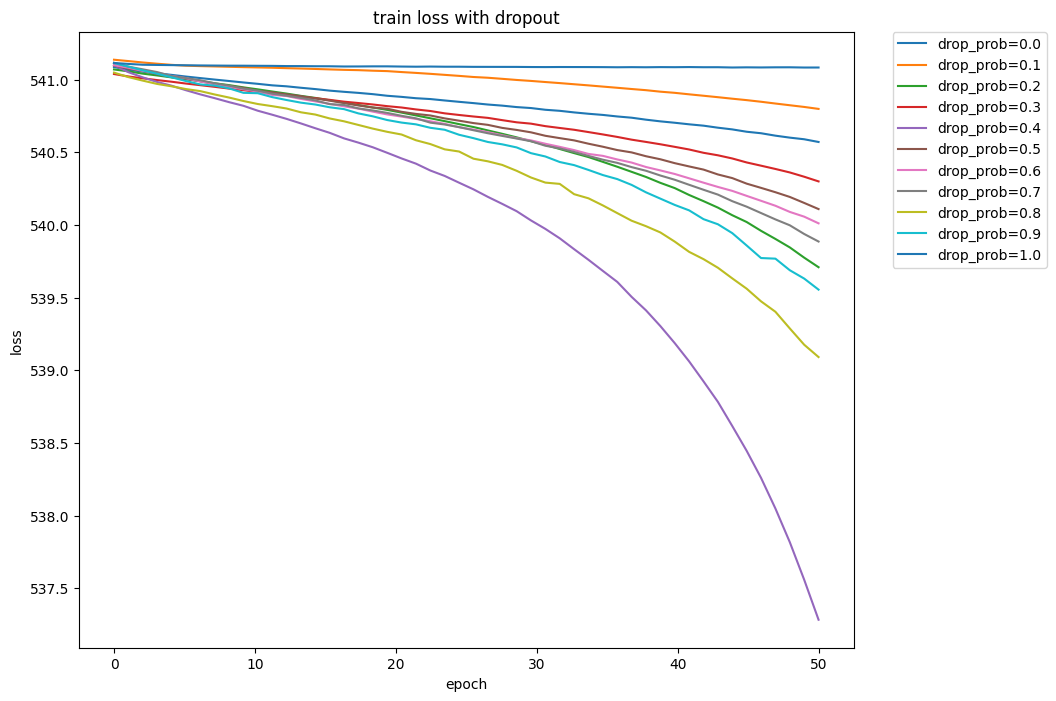

In [109]:
x = np.linspace(0,len(train_ls),len(train_ls))
plt.figure(figsize=(10,8))
for i in range(0,len(drop_probs)):
    plt.plot(x,Train_ls[i],label= 'drop_prob=%.1f'%(drop_probs[i]),linewidth=1.5)
    plt.xlabel('epoch')
    plt.ylabel('loss')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.title('train loss with dropout')
plt.show()

在多分类任务实验中分别手动实现和用torch.nn实现L_2正则化


In [84]:
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=0)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

In [85]:
num_inputs,num_hiddens,num_outputs =784, 256,10
def init_param():
    W1 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens,num_inputs)), dtype=torch.float32)
    b1 = torch.zeros(1, dtype=torch.float32)
    W2 = torch.tensor(np.random.normal(0, 0.01, (num_outputs,num_hiddens)), dtype=torch.float32)
    b2 = torch.zeros(1, dtype=torch.float32)
    params =[W1,b1,W2,b2]
    for param in params:
        param.requires_grad_(requires_grad=True)
    return W1,b1,W2,b2
def relu(x):
    x = torch.max(input=x,other=torch.tensor(0.0))
    return x

In [86]:
def net(X):
    X = X.view((-1,num_inputs))
    H = relu(torch.matmul(X,W1.t())+b1)
    return torch.matmul(H,W2.t())+b2

In [87]:
loss = torch.nn.CrossEntropyLoss()
def SGD(paras,lr):
    for param in params:
        param.data -= lr * param.grad

In [88]:
def l2_penalty(w):
    return (w**2).sum()/2

In [89]:
def train(net,train_iter,test_iter,loss,num_epochs,batch_size,lr=None,optimizer=None,mylambda=0):
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        for X,y in train_iter :
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y)+ mylambda*l2_penalty(W1) + mylambda*l2_penalty(W2)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls)
        ls, count = 0, 0
        for X,y in test_iter:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y) + mylambda*l2_penalty(W1) + mylambda*l2_penalty(W2)
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls)
        if(epoch+1)%5==0:
            print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

In [90]:
lr = 0.01
num_epochs = 20

Lamda = [0,0.1,0.2,0.3,0.4,0.5]
Train_ls, Test_ls = [], []
for lamda in Lamda:
    print("current lambda is %f"%lamda)
    W1,b1,W2,b2 = init_param()
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD([W1,b1,W2,b2],lr = 0.001)
    train_ls, test_ls = train(net,train_iter,test_iter,loss,num_epochs,batch_size,lr,optimizer,lamda)
    Train_ls.append(train_ls)
    Test_ls.append(test_ls)

current lambda is 0.000000
epoch: 5, train loss: 534.281263, test loss: 90.718379
epoch: 10, train loss: 514.514242, test loss: 86.987380
epoch: 15, train loss: 470.487232, test loss: 78.783086
epoch: 20, train loss: 396.814354, test loss: 65.646750
current lambda is 0.100000
epoch: 5, train loss: 728.765221, test loss: 123.103188
epoch: 10, train loss: 677.870565, test loss: 114.453947
epoch: 15, train loss: 627.960071, test loss: 105.795667
epoch: 20, train loss: 572.883929, test loss: 96.158462
current lambda is 0.200000
epoch: 5, train loss: 850.388552, test loss: 142.168692
epoch: 10, train loss: 728.271680, test loss: 122.289807
epoch: 15, train loss: 649.338520, test loss: 109.352824
epoch: 20, train loss: 594.785609, test loss: 100.282443
current lambda is 0.300000
epoch: 5, train loss: 917.368740, test loss: 151.616054
epoch: 10, train loss: 723.647152, test loss: 120.912194
epoch: 15, train loss: 627.684634, test loss: 105.663831
epoch: 20, train loss: 578.833462, test loss: 

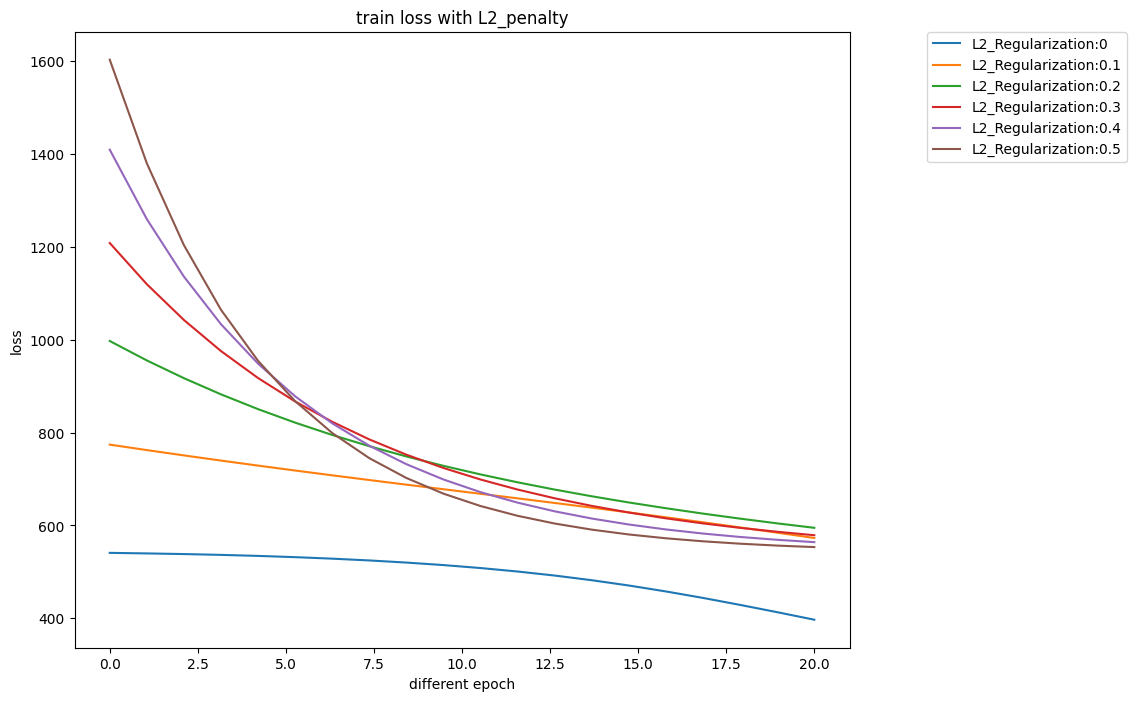

In [91]:
x = np.linspace(0,len(Train_ls[1]),len(Train_ls[1]))
plt.figure(figsize=(10,8))
for i in range(0,len(Lamda)):
    plt.plot(x,Train_ls[i],label= f'L2_Regularization:{Lamda [i]}',linewidth=1.5)
    plt.xlabel('different epoch')
    plt.ylabel('loss')
plt.legend(loc=2, bbox_to_anchor=(1.1,1.0),borderaxespad = 0.)
plt.title('train loss with L2_penalty')
plt.show()

nn

In [110]:
device='cuda:0'
train_loader = DataLoader(mnist_train,batch_size= 64,shuffle=False)
test_loader = DataLoader(mnist_test,batch_size= 64,shuffle= True)

In [111]:
class LinearNet(nn.Module):
    def __init__(self,num_input,num_hidden,num_output):
        super(LinearNet,self).__init__()
        self.linear1 = nn.Linear(num_input,num_hidden).to(device)
        self.linear2 =nn.Linear(num_hidden,num_output).to(device)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
    def forward(self,x):
        out = self.flatten(x)
        out = self.relu(self.linear1(out))
        out = self.linear2(out)
        return out

In [112]:
num_input,num_hidden ,num_output = 784,256,10
net = LinearNet(num_input,num_hidden,num_output).to(device = 'cuda:0')

for param in net.state_dict():
    print(param)
loss = nn.CrossEntropyLoss()
num_epochs = 100
net = LinearNet(num_input,num_hidden,num_output)
param_w = [net.linear1.weight,net.linear2.weight]
param_b = [net.linear1.bias,net.linear2.bias]
optimzer_w = torch.optim.SGD(param_w,lr=0.001,weight_decay=0.01)
optimzer_b = torch.optim.Adam(param_b,lr=0.001)

linear1.weight
linear1.bias
linear2.weight
linear2.bias


In [113]:
def train(net,num_epochs):
    train_ls,test_ls = [],[]
    for epoch in range(num_epochs):
        ls = 0
        for x ,y in train_loader:
            x,y = x.cuda(),y.cuda()
            y_pred = net(x)
            l = loss(y_pred,y)
            optimzer_w.zero_grad()
            optimzer_b.zero_grad()
            l.backward()
            optimzer_w.step()
            optimzer_b.step()
            ls += l.item()
        train_ls.append(ls)

        ls = 0
        for x ,y in test_loader:
            x,y = x.cuda(),y.cuda()
            y_pred = net(x)
            l = loss(y_pred,y)
            l += l.item()
            ls += l.item()
        test_ls.append(ls)
        print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
        gc.collect()
        torch.cuda.empty_cache()
    return train_ls,test_ls

In [114]:
train_ls,test_ls=train(net,num_epochs)

epoch: 1, train loss: 2009.301110, test loss: 624.975379
epoch: 2, train loss: 1721.656312, test loss: 519.217656
epoch: 3, train loss: 1407.447311, test loss: 416.457967
epoch: 4, train loss: 1138.783421, test loss: 338.563682
epoch: 5, train loss: 945.697659, test loss: 285.387112
epoch: 6, train loss: 814.085807, test loss: 248.781251
epoch: 7, train loss: 722.798542, test loss: 223.428063
epoch: 8, train loss: 657.475842, test loss: 204.639905
epoch: 9, train loss: 608.842860, test loss: 190.776350
epoch: 10, train loss: 571.418058, test loss: 179.637505
epoch: 11, train loss: 541.804521, test loss: 171.120457
epoch: 12, train loss: 517.838625, test loss: 163.965672
epoch: 13, train loss: 498.081919, test loss: 157.641896
epoch: 14, train loss: 481.538045, test loss: 152.544488
epoch: 15, train loss: 467.498921, test loss: 147.964875
epoch: 16, train loss: 455.445606, test loss: 144.872892
epoch: 17, train loss: 444.990213, test loss: 141.836875
epoch: 18, train loss: 435.839556, t

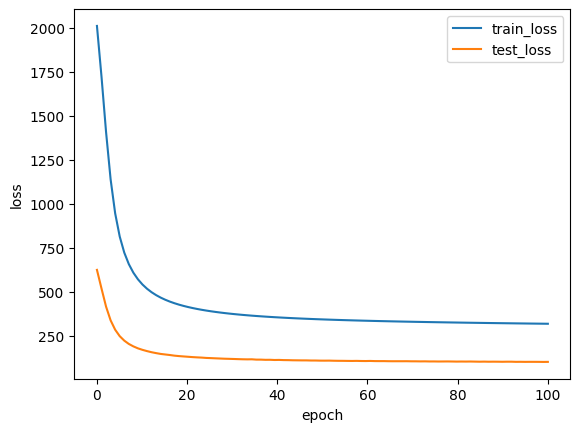

In [116]:
x = np.linspace(0, len(train_ls), len(train_ls))
plt.plot(x, train_ls, label="train_loss", linewidth=1.5)
plt.plot(x, test_ls, label="test_loss", linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

k

In [10]:
from torch.utils.data import TensorDataset

train_x = mnist_train.data.cuda().type(torch.float32)
train_y = mnist_train.targets.cuda()
test_x = mnist_test.data.cuda().type(torch.float32)
test_y = mnist_test.targets.cuda()
batch_size = 64
train_data = TensorDataset(train_x, train_y)
train_iter = DataLoader(
    dataset=train_data,
    shuffle=True,
    batch_size=batch_size
)
test_data = TensorDataset(test_x, test_y)
test_iter = DataLoader(
    dataset=test_data,
    shuffle=True,
    batch_size=batch_size
)


class flatten(nn.Module):
    def __init__(self):
        super(flatten, self).__init__()

    def forward(self, x):
        return x.view(x.shape[0], 784)


class Linear1(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super(Linear1, self).__init__()
        self.linear1 = nn.Linear(num_input, num_hidden)
        self.linear2 = nn.Linear(num_hidden, num_output)
        self.flatten = flatten()
        self.relu = nn.ReLU()

    def forward(self, input):
        out = self.flatten(input)
        out = self.relu(self.linear1(out))
        out = self.linear2(out)
        return out


class Linear2(nn.Module):
    def __init__(self, num_input, num_hidden1, num_hidden2, num_output):
        super(Linear2, self).__init__()
        self.linear1 = nn.Linear(num_input, num_hidden1)
        self.linear2 = nn.Linear(num_hidden1, num_hidden2)
        self.linear3 = nn.Linear(num_hidden2, num_output)
        self.flatten = flatten()
        self.relu = nn.ReLU()

    def forward(self, input):
        out = self.flatten(input)
        out = self.relu(self.linear1(out))
        out = self.relu(self.linear2(out))
        out = self.linear3(out)
        return out


class Linear3(nn.Module):
    def __init__(self, num_input, num_hidden1, num_hidden2, num_hidden3, num_output):
        super(Linear3, self).__init__()
        self.linear1 = nn.Linear(num_input, num_hidden1)
        self.linear2 = nn.Linear(num_hidden1, num_hidden2)
        self.linear3 = nn.Linear(num_hidden2, num_hidden3)
        self.linear4 = nn.Linear(num_hidden3, num_output)
        self.flatten = flatten()
        self.relu = nn.ReLU()

    def forward(self, input):
        out = self.flatten(input)
        out = self.relu(self.linear1(out))
        out = self.relu(self.linear2(out))
        out = self.relu(self.linear3(out))
        out = self.linear4(out)
        return out

In [11]:
batch_size = 64
train_data = TensorDataset(train_x, train_y)
train_iter = DataLoader(
    dataset=train_data,
    shuffle=True,
    batch_size=batch_size
)
test_data = TensorDataset(test_x, test_y)
test_iter = DataLoader(
    dataset=test_data,
    shuffle=True,
    batch_size=batch_size
)
import torch, gc

#使用两个隐藏层，隐藏层单元数为256、128
num_input, num_hidden1, num_hidden1, num_output = 784, 256, 128, 10
lr = 0.001
net = Linear2(num_input, num_hidden1, num_hidden1, num_output).cuda()
loss = nn.CrossEntropyLoss(reduction='mean')
# optimizer = torch.optim.Adam(net.parameters(),lr = lr)
optimizer = torch.optim.SGD(net.parameters(), lr=lr)


def train(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer):
    train_ls, test_ls, train_acc, test_acc = [], [], [], []
    for epoch in range(num_epochs):
        train_ls_sum, train_acc_sum, n = 0, 0, 0
        for x, y in train_iter:
            y_pred = net(x)
            l = loss(y_pred, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_ls_sum += l
            train_acc_sum += (y_pred.argmax(dim=1) == y).sum().item()
            n += x.shape[0]
        train_ls.append(train_ls_sum)
        train_acc.append(train_acc_sum / n)

        test_ls_sum, test_acc_sum, n = 0, 0, 0
        for x, y in test_iter:
            y_pred = net(x)
            l = loss(y_pred, y)
            test_ls_sum += l
            test_acc_sum += (y_pred.argmax(dim=1) == y).sum().item()
            n += x.shape[0]
        test_ls.append(test_ls_sum)
        test_acc.append(test_acc_sum / n)
        print('epoch: %d, train loss: %f, test loss: %f , train acc: %f, test acc: %f  '
              % (epoch + 1, train_ls[-1], test_ls[-1], train_acc[-1], test_acc[-1]))
        gc.collect()
        torch.cuda.empty_cache()
    return train_ls, test_ls,train_acc,test_acc


# num_epochs = 40
# train_ls, test_ls = train(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer)
# #结果可视化
# for i, v in enumerate(train_ls): train_ls[i] = v.cpu().item()
# for i, v in enumerate(test_ls): test_ls[i] = v.cpu().item()
# x = np.linspace(0, len(train_ls), len(train_ls))
# plt.plot(x, train_ls, label="train_loss", linewidth=1.5)
# plt.plot(x, test_ls, label="test_loss", linewidth=1.5)
# plt.xlabel("epoch")
# plt.ylabel("loss")
# plt.legend()
# plt.show()

In [12]:
def get_data_iter(X_train, y_train, X_valid, y_valid, batch_size):
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    test_dataset = torch.utils.data.TensorDataset(X_valid, y_valid)
    train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_iter, test_iter


def get_kfold_data(k, i, X, y):
    fold_size = X.shape[0] // k
    val_start = i * fold_size
    if i != k - 1:
        val_end = (i + 1) * fold_size
        X_valid, y_valid = X[val_start:val_end], y[val_start:val_end]
        X_train = torch.cat((X[0:val_start], X[val_end:]), dim=0)
        y_train = torch.cat((y[0:val_start], y[val_end:]), dim=0)
    else:
        X_valid, y_valid = X[val_start:], y[val_start:]
        X_train = X[0:val_start]
        y_train = y[0:val_start]

    return X_train, y_train, X_valid, y_valid


def k_fold(k, X_train, y_train, if_reshape, num_epochs, num_inputs, net, loss,optimizer):
    my_k_train_ls, my_k_valid_ls, my_k_train_ac, my_k_valid_ac = [], [], [], []
    train_loss_sum, valid_loss_sum, train_ac_sum, valid_ac_sum = 0, 0, 0, 0
    for i in range(k):
        print('第', i + 1, '折验证结果')
        X_train, y_train, X_valid, y_valid = get_kfold_data(k, i, X_train, y_train)
        train_iter, valid_iter = get_data_iter(X_train, y_train, X_valid, y_valid, batch_size=100)
        train_loss, val_loss, train_acc, test_acc = train(net, train_iter, test_iter, loss, num_epochs, batch_size, optimizer)
        my_k_train_ls.append(train_loss)
        my_k_valid_ls.append(val_loss)
        train_loss_sum += train_loss[-1]
        valid_loss_sum += val_loss[-1]
        my_k_train_ac.append(train_acc)
        my_k_valid_ac.append(test_acc)
        train_ac_sum += train_acc[-1]
        valid_ac_sum += test_acc[-1]

    print("最终平均k折交叉验证结果")

    print(f'average train loss: {train_loss_sum / k}')
    print(f'average valid loss: {valid_loss_sum / k}')
    print(f'average train ac: {train_ac_sum / k}')
    print(f'average valid ac: {valid_ac_sum / k}')

    return my_k_train_ls, my_k_valid_ls, my_k_train_ac, my_k_valid_ac


k = 10
mynum_epochs = 40

In [13]:
my_k_train_ls, my_k_valid_ls,my_k_train_ac, my_k_valid_ac = k_fold(k,train_x, train_y,if_reshape=False,num_epochs=mynum_epochs,num_inputs = 500,net =net,loss= loss,optimizer=optimizer)

第 1 折验证结果
epoch: 1, train loss: 303.353119, test loss: 44.879253 , train acc: 0.852537, test acc: 0.916200  
epoch: 2, train loss: 132.322784, test loss: 33.719639 , train acc: 0.928407, test acc: 0.937300  
epoch: 3, train loss: 100.272850, test loss: 31.385874 , train acc: 0.946130, test acc: 0.941900  
epoch: 4, train loss: 82.662003, test loss: 27.036518 , train acc: 0.954259, test acc: 0.949500  
epoch: 5, train loss: 70.653679, test loss: 24.394041 , train acc: 0.960981, test acc: 0.954200  
epoch: 6, train loss: 61.504250, test loss: 24.528154 , train acc: 0.966796, test acc: 0.953900  
epoch: 7, train loss: 54.755608, test loss: 22.617985 , train acc: 0.969444, test acc: 0.957200  
epoch: 8, train loss: 48.994057, test loss: 21.599926 , train acc: 0.973407, test acc: 0.958900  
epoch: 9, train loss: 43.967682, test loss: 21.035719 , train acc: 0.975981, test acc: 0.960100  
epoch: 10, train loss: 39.424553, test loss: 20.964125 , train acc: 0.978722, test acc: 0.959900  
epoch:

RuntimeError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 6.00 GiB total capacity; 4.12 GiB already allocated; 248.00 KiB free; 4.14 GiB reserved in total by PyTorch)

In [ ]:
train_loss, valid_loss = [], []
for i in range(len(my_k_train_ls)):
    train_loss.append(my_k_train_ls[i][-1])
    valid_loss.append(my_k_valid_ls[i][-1])

x = np.linspace(0,len(my_k_train_ls),len(my_k_train_ls))
plt.plot(x,train_loss,'o-',label='train_loss',linewidth=1.5)
plt.plot(x,valid_loss,'o-',label='valid_loss',linewidth=1.5)
plt.xlabel('K value')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
train_ac, valid_ac = [], []
for i in range(len(my_k_train_ac)):
    train_ac.append(my_k_train_ac[i][-1])
    valid_ac.append(my_k_valid_ac[i][-1])

x = np.linspace(0,len(my_k_train_ac),len(my_k_train_ac))
plt.plot(x,train_ac,'o-',label='train_ac',linewidth=1.5)
plt.plot(x,valid_ac,'o-',label='valid_ac',linewidth=1.5)
plt.xlabel('K value')
plt.ylabel('ac')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
# 绘制表格
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
randn = np.random.randn
idx = []
for i in range(1,21):
    idx.append(f'epoch {i}')

data_train, data_valid = np.zeros((10,20)),np.zeros((10,20))
for i in range(10):
    for j in range(20):
        data_train[i,j], data_valid[i,j] = my_k_train_ls[i][j], my_k_valid_ls[i][j]

df = pd.DataFrame(data_train.T, index=idx, columns=['第1折', '第2折', '第3折', '第4折', '第5折',
                                                '第6折', '第7折', '第8折', '第9折', '第10折'])

vals = np.around(df.values,7)
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])
the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns,
                    colWidths = [0.1]*vals.shape[1], loc='center',cellLoc='center')
the_table.set_fontsize(20)

the_table.scale(2.5,2.58)